Import standard modules:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, Image
HTML('../style/course.css') #apply general CSS

## <a id='instrum:sec:jones'></a><!--\label{instrum:sec:jones}--> Jones Notation


*Jones notation*, or ***Jones calculus***, forms the foundation of the radio interferometer measurement equation (RIME). Jones calculus is a mathematical description of the propagation of electromagnetic plane waves. The signal measured by any telescope is not a perfect representation of the original astrophysical signal, but is rather contaminated by successive layers of propagation effects as the signal makes its way from the astrophysical source to an actual measurement on our instrument. Jones notation gives us a mathematical way of describing these corruptions. The business of estimating and removing the corruptions is called **calibration**. In this section we simply introduce Jones notation and show how it can be used to describe propagation effects, i.e. physical processes an astrophysical signal undergoes between being emitted and being measured..


### 1. Electromagnetic plane waves & polarization 
For starters, we need to understand that the electromagnetic (EM) radiation we are measuring comes in the form of plane waves (since the sources of radiation are sufficiently far away from the observer). Mathematically, this means the following: pick a coordinate frame $xyz$, where $z$ points along the direction of propagation. In general, any electric field at point $(x,y,z)$ and time $t$ can be described by a complex 3-vector:

<span style="background-color:cyan">
We know that radio waves are electromagnetic waves. Since astrophysical sources are distant enough that we can treat them, for all intents and purposes, as though they were infinitely distant, these waves can be treated as *plane waves*.
</span>

<span style="background-color:cyan">
We thus pick a Cartesian frame of reference with basis $(x,y,z)$, where $z$ is the direction of our wave's propagation. In general, any electric field at point $(x,y,z)$ and time $t$ can be described by a complex 3-vector:
</span>

$$\mathbf{e}(x,y,z,t) = \left[ \begin{array}{c}e_x\\e_y\\e_z\end{array} \right].$$

This is the general case. If we have a plane wave, then the EM field vector has two specific properties:

<span style="background-color:cyan">
In the specific case of a planar wave, we also have the following properties:
</span>

* the field vector is the same across the entire $xy$ plane, $\mathbf{e}(x,y,z,t)\equiv\mathbf{e}(0,0,z,t)$
* its component along the direction of propagation is null, $e_z=0.$

In this case we can describe the entire plane wave (as a function of time) by a single complex 2-vector:
$$\mathbf{e}(z,t) = \left[ \begin{array}{c}e_x\\e_y\end{array} \right].$$
 

The images below (courtesy of [the Wikipedia page for plane waves &#10142;](https://en.wikipedia.org/wiki/Plane_wave)) show two very special kinds of ***coherent*** plane waves; respectively, fully ***linearly*** and fully ***circularly*** polarized waves. Both are ***monochromatic***. Note that this only shows the complex amplitude of the $e_x$ and $e_y$ components.

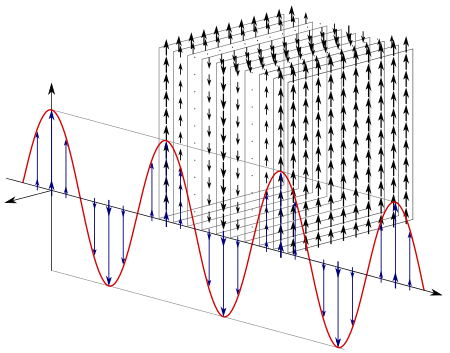

In [16]:
Image(filename="planewave_linear.png")

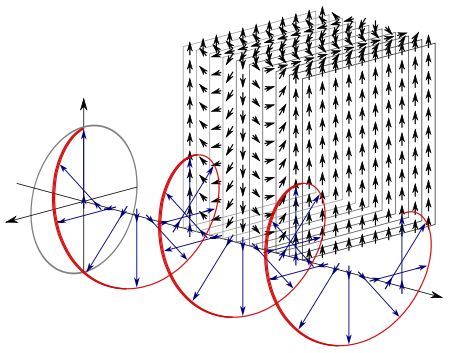

In [17]:
Image(filename="planewave_circular.png")

**Figure 1**: Two different light polarisations <a id='instrum:fig:planewave_linear'></a><!--\label{instrum:fig:planewave_linear}--> <a id='instrum:fig:planewave_circular'></a><!--\label{instrum:fig:planewave_circular}-->

The $\mathbf{e}$-vector of these two plane waves follows some very specific equations.

<span style="background-color:cyan">
The $\mathbf{e}$-vector of these two plane waves can be written as:
</span>

* For a linearly polarized [along the $x$ axis] plane wave: 
$$e_x = A_0 \cos( 2\pi(z - ct)/\lambda+\phi),~~~e_y=0.$$

* For a cicularly polarized plane wave: 
$$e_x = A_0 \cos( 2\pi(z - ct)+\phi), ~~~e_y = A_0 \sin( 2\pi(z - ct)/\lambda+\phi),$$

Here, $A_0$ is the wave's amplitude, $\lambda$ its wavelength, $\phi$ is its phase shift, and $c$ its speed (i.e. the speed of light).

### <a id='instrum:sec:jones:stokes'></a> <!--\label{instrum:sec:jones:stokes}--> 2. Incoherent radiation and Stokes parameters

The above shows *coherent* radiation; the radiation from astrophysical sources is, by its nature, *incoherent* and broad-spectrum because is is the result of a natural processes. In other words, it is essentially noise-like -- you can think of the $\vec{e}$ vector as "waving around" more or less randomly, so the neat figures above do not really apply.


We can avoid the broad spectrum issue for now by considering radiation within a narrow frequency bin $[\nu-\Delta\nu/2,\nu+\Delta\nu/2]$, that is a bin centred at $\nu$, with a bandwidth of $\Delta \nu$. As we'll see elsewhere in this chapter, most instruments measure signals within such narrow frequency bins; we can think of the full broad-spectrum signal as being a superposition of near-monochromatic signals.


As for polarization, it is still possible to describe the signal's polarisation state in a statistical sense. This is done in terms of the ***Stokes parameters***, which are defined in terms of the ***coherency*** of the $\mathbf{e}$-vector components (the $\langle\cdot\rangle$ operator indicates averaging over time):

$$\begin{eqnarray}
I&=&\langle e_x e_x^*\rangle + \langle e_y e_y^*\rangle\\
Q&=&\langle e_x e_x^*\rangle - \langle e_y e_y^*\rangle\\
U&=&\langle e_x e_y^*\rangle+\langle e_y e_x^*\rangle = 2 \Re \langle e_x e_y^*\rangle \\
V&=&-\imath(\langle e_x e_y^*\rangle-\langle e_y e_x^*\rangle) = 2 \Im \langle e_x e_y^*\rangle
\end{eqnarray}
$$

$I$ is the total power (flux) in the signal. $Q$ and $U$ correspond to linearly polarized flux, while $V$ corresponds to circularly polarized flux. For a signal with $I=1, Q=0.01, U=0, V=0$ the $\mathbf{e}$-vector tends to "wave around" in the $x$ direction a little bit (or exactly 1%) more than in the $y$ direction; a signal with $Q=-0.01$ "waves around" the $y$ direction more than the $x$ direction; a signal with $Q=0,U=0.01$ tends to "wave around" the $45^\circ$ axis. The two perfectly polarized plane waves in the figure above correspond to $I=A_0, Q=A_0, U=0, V=0$ and $I=A_0, Q=0, U=0, V=A_0$ respectively.

#### 2.1. Alternative representations of polarization
The usual approach to interferometry is to describe polarization in terms of the four Stokes parameters $IQUV$, since this is the representation that most readily lends itself to Jones calculus (see below). You may come across some other ways to represent polarization in the scientific literature. We will describe them here, for the sake completeness.

**Fractional polarization** describes the polarization state in terms of the polarization fraction $p$, position angle $\psi$, and the angle $\chi$ (which determines the ratio of major axis to minor axis length):
$$\begin{eqnarray}
p &=& \frac{\sqrt{Q^2+U^2+V^2}}{I}\\
\psi &=& \frac{1}{2} \tan^{-1}\frac{U}{Q}\\
\chi &=& \frac{1}{2} \tan^{-1}\frac{V}{\sqrt{Q^2+U^2}}\\
\end{eqnarray}
$$

These parameters can be represented in the form of a so-called *polarisation ellipse* (image courtesy of [the Wikipedia page for the Stokes parameters &#10142;](https://en.wikipedia.org/wiki/Stokes_parameters)).

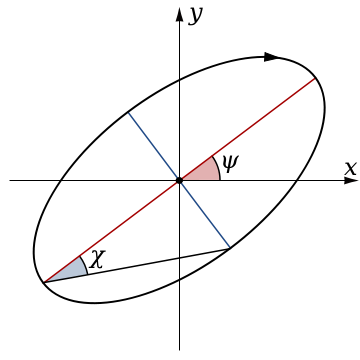

In [18]:
Image(filename="pol_ellipse.png")

**Figure 2**: Polarisation ellipse<a id='instrum:fig:pol_ellipse'></a><!--\label{instrum:fig:pol_ellipse-->

Circular polarization ($V$) is exceedingly rare in astrophysics, so the scientific literature often describes polarization using only $p$ and $\psi$. Physically speaking, these give the percentage of linearly polarized signal and its orientation on the sky respectively. In the examples above, for $I=1, Q=0.01, U=0, V=0$, the signal is said to be 1% linearly polarized ($p=0.01$) with polarixation angle $0^\circ$; a signal with $Q=-0.01$ has polarization angle $90^\circ$, a signal with $Q=0,U=0.01$ has polarization angle $45^\circ$ axis. This can be illustrated as (courtesy of [the Wikipedia page for the Stokes parameters &#10142;](https://en.wikipedia.org/wiki/Stokes_parameters)):

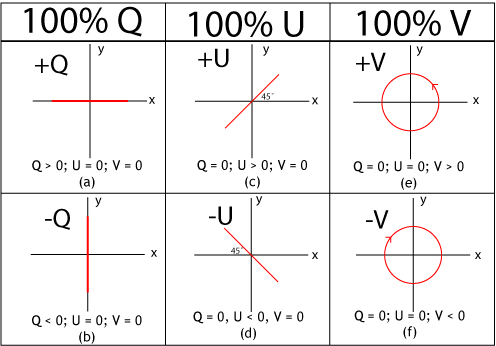

In [19]:
Image(filename="quv.png")

**Figure 3**: Polarisations corresponding to different values of $I,Q,U,V$ <a id='instrum:fig:7_1_2_.quv'></a><!--\label{instrum:fig:7_1_2_.quv}--> 

**Poincaré sphere**. Another way to represent polarization state is via the ***Poincaré vector*** $(S_1,S_2,S_3)=(Q,U,V)$. This vector lies on the so-called *Poincaré sphere*, whose radius is given by the total polarized flux $P=\sqrt{Q^2+U^2+V^2}$ (image courtesy of [the Wikipedia page for the Stokes parameters &#10142;](https://en.wikipedia.org/wiki/Stokes_parameters)):

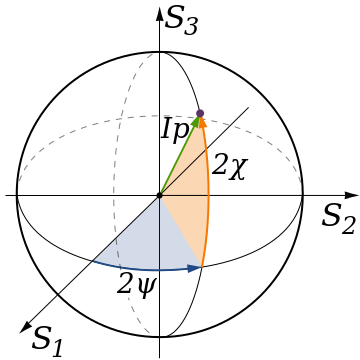

In [20]:
Image(filename="poincare_sphere.png")

**Figure 4**: Poincaré sphere <a id='instrum:fig:poincare_sphere'></a><!--\label{instrum:fig:poincare_sphere}-->

Propagation effects that change the polarization state (such as Faraday rotation) can often be described by rotation of the Poincaré vector.

In practice, you will seldom come across these representations in radio interferometry.

#### 2.2 Polarization over 100%? 
By definition of the Stokes parameters, a physical signal has the property $Q^2+U^2+V^2 \le I^2$, i.e. the polarized fraction cannot exceed 100%. This might seem obvious; however, a curious fact of radio interferometry is that it is possible to *observe* signals that appear to formally have polarization in excess of 100%. Recall that an interferometer samples a limited set of spatial frequencies, bound by its shortest and longest baselines. Therefore, if the $I$ flux varies smoothly over the sky (i.e. has very low spatial frequencies, or large spatial scales) while the polarized $QU$ varies on smaller scales, it is quite possible for the interferometer to "see" less (or even no) $I$ flux, and significant $QU$ flux. This is in fact the case when observing near the plane of the Milky Way: unpolarized synchrotron radiation from around the galactic plane is very smooth (on the order of degrees), and gets mostly suppressed, while the *polarized foregrounds* show smaller-scale structure (on the order of arcminutes) that is quite apparent to most interefometers. 

### 3. Propagation and Jones matrices 
Jones calculus lets us describe what happens to a signal as it interacts with some medium on it way to us. For example:

* propagation through free space
* propagation through a cloud or layer of electrons (i.e. the ionosphere)
* reflection off the dish surface
* propagation through the receiver electronics

The fundamental (and indeed only!) assumption of Jones calculus is that **all propagation effects are linear**. In other words, if the  original signal vector is $\mathbf{e}$ and the propagated vector is $\mathbf{e}'=\mathbf{f}(\mathbf{e})$, then

$$
\mathbf{f}(a\mathbf{e}_1+b\mathbf{e}_2) = a\mathbf{f}(\mathbf{e}_1)+b\mathbf{f}(\mathbf{e}_2).
$$

Fortunately, almost all reasonable physics of signal propagation - with very few, exotic exceptions - **are** linear. Using linear algebra properties, we know that any linear function on 2-vectors can be described by multiplication with a $2\times2$ matrix:

$$
\mathbf{e}' = \left[ \begin{array}{c}e'_x\\e'_y\end{array} \right] = 
\left[ \begin{array}{cc}j_{11} & j_{12} \\ j_{21} & j_{22} \end{array} \right] 
\left[ \begin{array}{c}e_x\\e_y\end{array} \right] = \mathbf{J} \mathbf{e}.
$$

$\mathbf{J}$ is called a ***Jones matrix***. Any (linear) propagation effect can thus be described by its own particular kind of Jones matrix. 

For example, we may consider the two complex voltages measured by our (dual-element) receiver as a voltage 2-vector, and therefore also treat it as a linear function of the EM vector input. The receiver itself can then be described by a Jones matrix:

$$
\mathbf{v} = \left[ \begin{array}{c}v_1\\v_2\end{array} \right] = 
\left[ \begin{array}{cc}j_{11} & j_{12} \\ j_{21} & j_{22} \end{array} \right] 
\left[ \begin{array}{c}e_x\\e_y\end{array} \right] = \mathbf{J} \mathbf{e}.
$$

Here, we transform $\mathbf{e}$ into $\mathbf{v}$ because we can treat the EM radiation as being converted into the voltage that our telescope measures.

### 4. Examples of specific Jones matrices 


In radio interferometry, Jones matrices are conventionally designated by a capital letter, with different letters corresponding to different propagation effects. Some examples are:

* K-Jones or geometric delay, describing propagation through a path in free space of length $\tau$. As we'll see later, the K-Jones matrix can be said - in a sense - to lie at the heart of all interferometry. K-Jones is an example of a *scalar matrix* (i.e. a diagonal matrix with the same element on the diagonal). We'll use normal-weight Roman font (e.g. $K$) to emphasize scalar matrices, as opposed to boldface ($\mathbf{K}$) for general matrices:

$$
\mathbf{K} = K = \left[ \begin{array}{cc}\mathrm{e}^{-2\pi \imath \tau / \lambda} & 0 \\ 0 & \mathrm{e}^{-2\pi \imath \tau / \lambda} \end{array} \right] = \mathrm{e}^{-2\pi \imath \tau / \lambda},
$$

* P-Jones, describing parallactic angle rotation (i.e. the rotation of the reference frame of the telescope w.r.t. the frame of the signal/sky). This is an example of a *rotation matrix*:

$$
\mathbf{P} = \left[ \begin{array}{cc}\cos\gamma & -\sin\gamma \\ \sin\gamma & \cos\gamma\end{array} \right] = \mathrm{Rot}\,\gamma.
$$

* Z-Jones is another scalar matrix. It describes the phase delay caused by propagation through the ionosphere, which is proportional to the ionospheric *total electron content* (TEC), and inversely proportional to frequency:

$$
Z = \mathrm{e}^{-\imath \kappa \mathrm{TEC} / \nu},
$$
where $\kappa$ is a proportionality constant.

* F-Jones describes *Faraday rotation* in the ionosphere. The angle of rotation is proportional to a quantity called the *rotation measure* (RM), and invesely proportional to frequency squared:

$$
\mathbf{F} = \left[ \begin{array}{cc}\cos (\mathrm{RM}/\nu^2) & -\sin (\mathrm{RM}/\nu^2) \\ \sin (\mathrm{RM}/\nu^2) & \cos (\mathrm{RM}/\nu^2) \end{array} \right] = \mathrm{Rot}(\mathrm{RM}/\nu^2).
$$


* G-Jones describes the *complex gain* of the dual-element receiver:

$$
\mathbf{G} = \left[ \begin{array}{cc} g_x & 0 \\ 0 & g_y \end{array} \right ].
$$

* In real life situations, it is sometimes useful to rely on the fact that the receiver gain has a frequency-dependent component that varies only slowly with time (the **bandpass**), and a time-variable component that is only weakly dependent on frequency (the gain per se). This propery allows us to split the complex gain into two separate diagonal matrices:

$$
\mathbf{G} = \left[ \begin{array}{cc} g_x(t) & 0 \\ 0 & g_y(t) \end{array} \right],~~~
\mathbf{B} = \left[ \begin{array}{cc} b_x(\nu) & 0 \\ 0 & b_y(\nu)  \end{array} \right].
$$

* E-Jones describes the *primary beam gain*.

* D-Jones describes the *polarization leakage*, which is caused by to "cross-talk" between the two receiver elements. It typically looks like

$$
\mathbf{D} = \left[ \begin{array}{cc} 1 & d \\ -d & 1 \end{array} \right],~~d\ll 1
$$

Both the E- and D-Jones terms are examples of direction-dependent effects.

Note that the above are only examples. Depending on our instrumental model, the G-, B-, E-, and D-Jones terms may take a different form, or may be rolled into a single Jones matrix.

### 5. Jones chains<a id='instrum:sec:jones:chains'></a><!--\label{instrum:sec:jones:chains}-->
A sequence of propagation effects is equivalent to a chain of Jones matrix multiplications. We can thus describe the voltage vector our instrument measures as follows:
$$
\mathbf{v} = \mathbf{J}_n \mathbf{J}_{n-1} ... \mathbf{J}_1 \mathbf{e} = \mathbf{Je},
$$

where the individual Jones terms describe the different effects in sequence. The system then has an overall Jones matrix of 
$\mathbf{J}_{\textrm{sys}} = \mathbf{J}_n \mathbf{J}_{n-1} ... \mathbf{J}_1
$.

For example a system Jones chain might be $\mathbf{J}_{\textrm{sys}} = \mathbf{G} \, \mathbf{B} \, \mathbf{D} \, \mathbf{E} \, \mathbf{K} \, \mathbf{P} \, \mathbf{Z} \, \mathbf{F}$. Note that the order of the chain is important: the original signal is operated on by the Jones chain in the order of in which the propagation effects occur. If, for example, the signal is Faraday rotated on its way through the ionosphere, then modulated by the primary beam, before gain is applied by the amplifiers, then $\mathbf{F}$ must be applied before $\mathbf{E}$, which must be applied before $\mathbf{G}$. ***In general matrix multiplication does not commute.***

In real-life observations, some of the effects in the chain are known perfectly in advance (e.g. K-Jones, P-Jones), others may have a reasonable prior model (E-Jones), and some can only be *estimated* through calibration (e.g. G-Jones, B-Jones)

From linear algebra we know that in gneral, matrix multiplication does not commute. The order of our chaining Jones matrices therefore **must** correspond to the physical order of the effects experienced by the signal. Some kinds of matrices **do** commute, however. The rules for commutation are as follow:

* a scalar matrix commutes with any matrix. The K- and Z-Jones matrices can thus be moved anywhere in the the chain without affecting the result.

* diagonal matrices commute among themselves. The B- and G-Jones terms may thus be swapped without changing the result.

* rotation matrices commute among themselves. The P- and F-Jones terms may thus be swapped.

The combination of Jones chains and linear algebra is the source of the tremendous power and utility of Jones calculus. In a nutshell:

* To determine the true underlying astrophysical signal, we must model all the instrumentation and propagation effects.

* Jones calculus allows us to construct a notionally perfect description of signal propagation, with individual effects described by elements of the Jones chain.

* We can then use our prior knowledge to fix some of the Jones terms in the chain.

* We can use calibration to estimate others.

* We can use the rules of linear algebra to reorder the Jones terms where allowed, in order to simplify our calculations. 